In [1]:
print("Python běží!")

Python běží!


In [2]:
import sys
import easyocr
sys.path.append('../')
sys.path.append('../my_libs/')
sys.path.append('../my_libs/img/')

!{sys.executable} -m pip install -r ../../pip-dependencies.txt

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import my_libs as ml
from my_libs.tools import *
from my_libs.fft import *
from my_libs.colors import *
from my_libs.img.processing import *

In [4]:
ml.tools.printf("Hello world!")

Hello world!

<h1>CVIČENÍ 9: OBČANSKÝ PRŮKAZ</h1>

Vytvořte  program  pro  strojové  odečítání  údajů  z občanského  průkazu  ČR. 
Průkaz může být  vůči kameře libovolně  otočen,  a  to  i  mimo  rovinu  obrazu. 
Pro jednoduchost uvažujte pouze jednu  variantu  se strojově čitelnými údaji 
vydávanou v letech 2012-2014.

Načtěte vzorový obraz obcansky_prukaz_cr_sablona_2012_2014.png. 
- Pomocí  metody  SIFT  najděte zájmové body a extrahujte z jejich  okolí 
deskriptory. 
- Načtěte  jeden z  testovacích  obrazů z archivu  cv09.zip a  shodným 
způsobem  jako u vzorového  obrazu  na něm detekujte zájmové body a 
extrahujte jejich deskriptory. 
- Každému  bodu  ze  vzorového  obrazu  přiřaďte  nejpodobnější  bod 
z testovacího obrazu  porovnáním  jejich  deskriptorů.  Odfiltrujte 
nejednoznačné  korespondence přiřazení  dle  poměru vzdáleností 
nejbližšího a druhého nejbližšího souseda. 
- Na  základě  lokálních  korespondencí  odhadněte  projektivní 
geometrickou transformaci  mezi  oběma  obrazy  a  vykreslete  přesnou 
pozici průkazu vyznačením jeho hran na testovacím obrázku. 
- Vyřízněte  průkaz  z testovacího obrazu a zarovnejte tak, aby bylo 
možné  ze  známých  (a  vždy  stejných)  pozic  odečíst  údaje.  Příklad 
zarovnaného průkazu je na obrázku 10_cze_id.jpg. 
- V samostatném okně zobrazte fotografii  majitele  průkazu  a  do  ní 
připište  jeho  jméno  a  příjmení  odečtená  ze  zarovnaného  průkazu 
pomocí některého z nástrojů OCR, např. easyocr.

(420, 669, 3)


libpng warning: iCCP: known incorrect sRGB profile


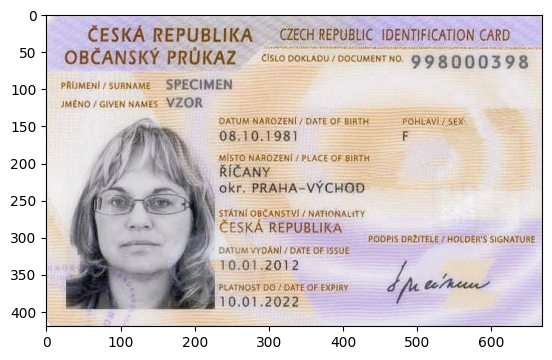

In [5]:
img = cv2.imread("./data/obcansky_prukaz_cr_sablona_2012_2014.png")
img_pat = cv2.imread("./data/10_cze_id.jpg")
plt.imshow(img_pat)
print(img_pat.shape)

In [6]:
reader = easyocr.Reader(["en"], gpu=False);
text = reader.readtext(img_pat)

Using CPU. Note: This module is much faster with a GPU.
/home/pytel/.local/lib/python3.12/site-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


CESKA REPUBLIKA
CZECH REPUBLIC   IDENTIFICATION CARD
OBCANSKY PRUKAZ
CIsLo DOKLADU
DOCUMENT NO:
998000398
PRIJMENI / SURNAME
SPECIMEN
JMENO
GIVEN NAMES VZOR
DATUM NaAOZENI
DATE OF BIRTH
POHLAvI / SEX
08,10,1981
Misto NAROZENI
PLACE OF BiRTK
RICANY
okr. PRAHA-VYCHOD
STATNI OBCANSTVI / Nationality
CESKA REPUBLIKA
Padpis DAZITELE / HOLDER"5 SIGNATURE
DATum VyDaNi , DATE OF Issue
10.01.2012
PLATNOST DO / DATE @F Expiry
M eux
10,01.2022
[([[0, 0], [np.int32(55), 0], [np.int32(55), 18], [0, 18]], 'VZOR', np.float64(0.9955874085426331))]


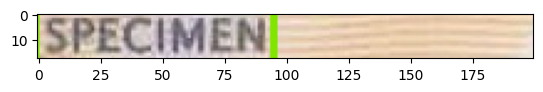

In [8]:
boxes = []
for t in text:
    bbox, chars, score = t
    boxes.append(bbox)
    cv2.rectangle(img_pat, bbox[0], bbox[2], (128, 230, 0), 2)
    print(chars)

specimen_coor = [(159,86), (359, 86), (359, 104), (159, 104)]
vzor_coor = [(159, 110), (359, 110), (359, 128), (159, 128)]

spec_img = img_pat[specimen_coor[0][1]:specimen_coor[2][1], specimen_coor[0][0]:specimen_coor[2][0]]
vzor_img = img_pat[vzor_coor[0][1]:vzor_coor[2][1], vzor_coor[0][0]:vzor_coor[2][0]]

text_vzor = reader.readtext(vzor_img)
print(text_vzor)
text_specimen = reader.readtext(spec_img)

photo_coor = [(26, 132), (227, 132), (227, 397), (26, 397)]
photo_img = img_pat[photo_coor[0][1]:photo_coor[2][1], photo_coor[0][0]:photo_coor[2][0]]

img_with_text = photo_img.copy()
img_with_text = cv2.putText(img_with_text, "jmeno: " + text_vzor[0][1], (5, 25), 5, 0.7, color=[255, 55, 0], thickness=1)
img_with_text = cv2.putText(img_with_text, "prijmeni: " + text_specimen[0][1], (5, 45), 5, 0.7, color=[255, 55, 0], thickness=1)
plt.imshow(img_with_text)
plt.imshow(spec_img)

